In [90]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
import sounddevice as sd
import soundfile as sf

In [91]:
Digits = True
Record = False
Duration = 1
label = "test.wav"
Directory = "../Data/AudioFragments/"
# path = "C:/Users\Toonv\OneDrive\Documenten\Sound recordings\Recording.wav"
path = "../Data/AudioFragments/Recording11.wav"
# path = "C:/Users\Toonv\OneDrive\Documents\Sound Recordings/Recording.wav"
# path = "C:/Users\Toonv\Downloads/3.wav"


In [92]:
if Digits:
    HZ = 48000
    label_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    imported = tf.saved_model.load("saved-Digit-V2")
else:
    HZ = 16000
    label_names = ['down', 'go', 'left', 'no', 'right', 'stop', 'up', 'yes']
    imported = tf.saved_model.load("saved-Words")


In [93]:
if Record:
    path = Directory + label
    print("start")
    mydata = sd.rec(int(HZ * Duration), samplerate=HZ,
                    channels=1, blocking=True)
    print("end")
    sd.wait()
    sf.write(Directory + label, mydata, HZ)


In [94]:
prediction = imported(path)
samples, sample_rate = librosa.load(path, sr=HZ)
samples = librosa.resample(samples, sample_rate, HZ)
result = np.argmax(prediction[0])

C:\Users\Toonv\AppData\Local\Temp\ipykernel_14980\1254746655.py:3: FutureWarning: Pass orig_sr=48000, target_sr=48000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples = librosa.resample(samples, sample_rate, HZ)


In [95]:
ipd.display(ipd.Audio(samples, rate=HZ))

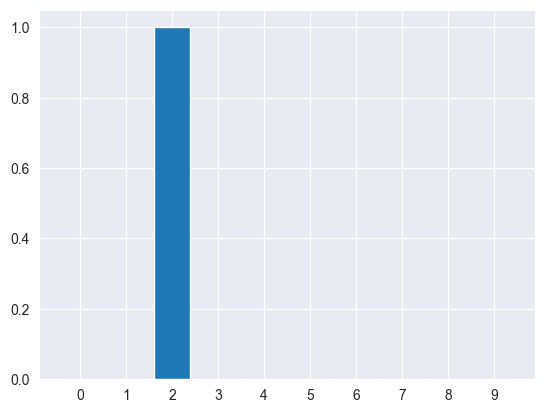

'2'

In [96]:
plt.bar(label_names, tf.nn.softmax(prediction[0]))
plt.show()
label_names[result]